In [1]:
from dolfin import *
import matplotlib.pyplot as plt
import numpy as np
import MatrixSolver as ms

Missing HsMG for fract norm computing


/home/saragazzoni/miniconda3/envs/myfenics/lib/python3.11/site-packages/setuptools/_distutils/cmd.py:66: SetuptoolsDeprecationWarning: setup.py install is deprecated.
!!

        ********************************************************************************
        Please avoid running ``setup.py`` directly.
        Instead, use pypa/build, pypa/installer, pypa/build or
        other standards-based tools.

        See https://blog.ganssle.io/articles/2021/10/setup-py-deprecated.html for details.
        ********************************************************************************

!!
  self.initialize_options()


## 2D Matrix

In [ ]:
mesh2D = RectangleMesh(Point(-1,-1),Point(1,1),20,20)
m0 = 1e-3
dt = 0.5
T = 50
save_interval = 10
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V = FunctionSpace(mesh2D,"P",1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma) - x[0]*x[0]/(2*sigma_x*sigma_x) - x[1]*x[1]/(2*sigma_x*sigma_x))",
                 m0 = m0,s0 = 0.5,sigma=sqrt(0.02),sigma_x = sqrt(0.008),s=0,degree=2)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/testMatrix2D"
f = Constant(0.0)
dz = 0.005
bc_type = 'Dirichlet_0'
f = Expression('3*1e5*exp(-x[0]*x[0]/(sigma_v*sigma_v) - x[1]*x[1]/(sigma_v*sigma_v))',sigma_v = 0.1,degree=2)

solver = ms.MatrixSolver2D(mesh2D, V, n0, c0, dt, T, save_interval, times, doses, path_sol, f, dz,bc_type)
solver.solve()

## 3D Matrix

In [3]:
mesh3D = BoxMesh(Point(0,0,0),Point(1,1,0.5),10,10,5)
m0 = 1e-3
dt = 0.5
T = 50
save_interval = 10
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V = FunctionSpace(mesh3D,"P",1)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(s-s0,2)/(2*sigma*sigma))",m0 = m0,s0 = 0.5,s=0,sigma=sqrt(0.02),degree=2)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/testMatrix3D"
f = Constant(0.0)
dz = 0.005
bc_type = 'Dirichlet_1'

solver = ms.MatrixSolver3D(mesh3D, V, n0, c0, dt, T, save_interval, times, doses, path_sol, f, dz, bc_type)
solver.solve()

time=0: 
Solving linear variational problem.
iter=1: norm=0.00144631
Solving linear variational problem.
iter=2: norm=2.31921e-06
LGMRES converged [iter= 1, time=2.00s, res=3.4e-07]
time=0.5: 
Solving linear variational problem.
iter=1: norm=0.00029559
LGMRES converged [iter= 1, time=1.97s, res=7.4e-07]
time=1: 
Solving linear variational problem.
iter=1: norm=0.000370209
LGMRES converged [iter= 2, time=4.20s, res=1.8e-08]
time=1.5: 
Solving linear variational problem.
iter=1: norm=0.000462336
LGMRES converged [iter= 2, time=4.04s, res=1.8e-08]
time=2: 
Solving linear variational problem.
iter=1: norm=0.00057582
LGMRES converged [iter= 2, time=4.27s, res=1.8e-08]
time=2.5: 
Solving linear variational problem.
iter=1: norm=0.000714998
LGMRES converged [iter= 2, time=4.12s, res=1.9e-08]
time=3: 
Solving linear variational problem.
iter=1: norm=0.000884725
LGMRES converged [iter= 2, time=4.16s, res=2.0e-08]
time=3.5: 
Solving linear variational problem.
iter=1: norm=0.00109047
Solving lin

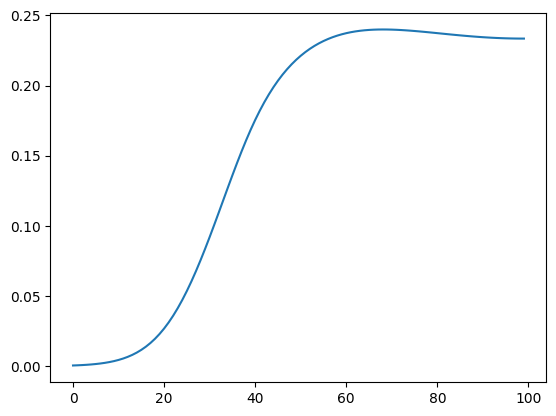

In [4]:
mass = np.load('solutions/testMatrix3D/mass.npy')
plt.plot(mass)